# Does the length of airplane flights influence percieved satisfaction among passengers

#### Author: Marcell Magda

#### Date: 20/12/2024

#### Subject: Data Analysis 2

## Abstract:

This study focuses on analyzing customer satisfaction among airline passengers, with an emphasis on understanding how flight distance and other variables influence this satisfaction. Utilizing a dataset from the Maven Analytics data playground, which includes various factors such as age, class of travel, type of travel, and in-flight services and more, the analysis aims to uncover patterns and relationships within the data. The dependent variable, customer satisfaction, is measured as a binary outcome, where 'Satisfied' responses are coded as 1, and all other responses are coded as 0. The primary explanatory variable of interest is flight distance, alongside control variables like age, class, type of travel, and various in-flight service ratings.

The methodology involves an initial exploratory data analysis (EDA) to understand the distributions of key variables and identify any potential data quality issues. Following this, linear regression models are developed. Special attention is paid to addressing multicollinearity by excluding one category in dummy variables and ensuring the correct data types for regression analysis.

In [52]:
# Ignore warnings
import os
import sys
import warnings
warnings.filterwarnings("ignore")

# Data handling
import numpy as np
import pandas as pd
from datetime import datetime

# Regression
from mizani.transforms import log_trans
from mizani.formatters import percent_format
from mizani.formatters import log_format
from plotnine import *
from scipy.stats import norm
import statsmodels.formula.api as smf

# Visuals
from stargazer.stargazer import Stargazer
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Introduction

In the current period marked by swift evolution in the airline industry, propelled by technological advancements and shifts in consumer preferences, grasping the determinants of passenger satisfaction is essential. Air travel, which was once considered a luxury, has transformed into a widely used mode of transport, presenting the challenge of upholding high standards of customer satisfaction. The airline sector is faced with a distinct array of challenges, encompassing aspects like operational efficiency, safety, and the enhancement of the passenger experience. Moreover, similar to other industries, it is susceptible to the fluctuations of the economy and has been impacted by downturns, a notable recent example being the Covid pandemic. In such a dynamic setting, the Airline Passenger Satisfaction (APS) Survey, utilizing the maven analytics dataset, serves as a pivotal metric, indicating the extent to which airlines meet or surpass passenger expectations in various service facets. It is noteworthy, however, that while this dataset is comprehensive, it omits specific details about airlines or flights, which complicates conducting more detailed analyses of the study's results in subsequent sections.

This study aims to:

- Analyze the correlation between APS and flight distance, considering the impact of longer flights on passenger satisfaction.
- Explore the relationship between APS and various factors such as age, class of travel, type of travel, and in-flight services.
- Investigate the role of in-flight amenities, such as seat comfort, leg room, food and drink, and in-flight entertainment, in shaping passenger satisfaction.
- Assess any correlation between APS and demographic factors like age and gender.

Based on initial insights and a cursory review of the data, the study posits the following expectations regarding the relationship between the Airline Passenger Satisfaction (APS) and the various influencing factors:

- Longer flights potentially lead to higher passenger satisfaction due to better in-flight services offered on such routes.
- Age and preferences for travel class may significantly influence passenger satisfaction, with varying expectations across different age groups and travel classes.
- In-flight amenities, including comfort, service quality, and entertainment options, play a crucial role in determining overall passenger satisfaction.
- Demographic factors, such as age and gender, might exhibit specific trends in terms of preferences and satisfaction levels.
- Delays may influence the perception of passenger regarding the quality of the flight.

The outcomes of this study are expected to provide insights into the airline industry's efforts to enhance passenger satisfaction, contributing to strategies that cater to diverse passenger needs and preferences in the ever-evolving, and sometimes hectic landscape of air travel.

## Part 2: Data

For the analysis conducted in this study, the dataset was sourced from the Maven Analytics Data Playground, specifically focusing on airline passenger satisfaction. The dataset, initially comprising 129,880 observations, represents individual airline passengers. Each observation includes various attributes related to the passenger's flight experience. After preprocessing, including handling missing values and creating necessary variables, the dataset was streamlined for the regression analysis. The pre processing also included drastically trimming down the number of values to comply with the exercise, a method of true random sampling (or as close as could be achived in python at my skill level) was used to get 5000 values to be used for the analysis.

**Primary Dependent Variable:**

The primary dependent variable for this study is airline passenger satisfaction, represented as a binary outcome in the 'satisfied_customer' variable, where '1' indicates satisfaction and '0' represents neutral or dissatisfied responses. This binary format simplifies the interpretation of the logistic regression analysis. 

**Explanatory Variable:**
- **Flight Distance:** The primary factor of interest, measuring the length of the flight in miles.

Control variables are categorized into different groups for a structured analysis:

**Demographic Indicators:**
- **Age:** The age of the passenger.
- **Female:** Is the passenger a woman.

**Travel Type/Class Indicators:**
- **Class_Economy:** Dummy variable indicating whether the passenger traveled in Economy class.
- **Class_Economy Plus:** Dummy variable indicating whether the passenger traveled in Economy Plus class.
- **Type of Travel_Personal:** Dummy variable indicating whether the travel was for personal reasons.

**In-Flight Service Indicators:**
- **In-flight Service:** Rating of the overall in-flight service.
- **Seat Comfort:** Rating of the seat comfort.
- **Leg Room Service:** Rating of the leg room service.
- **Food and Drink:** Rating of the food and drink service.

**Delay Indicators:**
- **Departure Delay:** Delay on departure.
- **Arrival Delay:** Delay on arrival.

Each of these variables was carefully chosen and prepared to capture different aspects of the airline travel experience that could influence passenger satisfaction. The transformation of categorical variables into dummy variables and the treatment of continuous variables (like flight distance and age) were key steps in the feature engineering process. 

This structured approach to categorizing the variables facilitates a more nuanced understanding of how various factors, from flight length to in-flight amenities, impact overall passenger satisfaction in the airline industry.

### 2.1 Load data

In [2]:
# Load the dataset
file_path_airline = 'airline_passenger_satisfaction.csv'
airline_data = pd.read_csv(file_path_airline)

### 2.2 Overview of data

In [34]:
# Checking data
data_overview = airline_data.head()

# Printing out checking variable
data_overview

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### 2.3 Check for missing values

In [35]:
# Checking for missing values and getting an overview of the dataset
missing_values_overview = airline_data.isnull().sum()

# Printing out
missing_values_overview

ID                                        0
Gender                                    0
Age                                       0
Customer_Type                             0
Type_of_Travel                            0
Class                                     0
Flight_Distance                           0
Departure_Delay                           0
Arrival_Delay                             0
Departure_and_Arrival_Time_Convenience    0
Ease_of_Online_Booking                    0
Check_in_Service                          0
Online_Boarding                           0
Gate_Location                             0
On_board_Service                          0
Seat_Comfort                              0
Leg_Room_Service                          0
Cleanliness                               0
Food_and_Drink                            0
In_flight_Service                         0
In_flight_Wifi_Service                    0
In_flight_Entertainment                   0
Baggage_Handling                

### 2.4 Remove missing values

In [5]:
# Cleaning the data by removing rows with missing or infinite values
airline_data = airline_data.replace(np.nan).dropna()

# Check if there are any Null values left
print('Number of null values:', airline_data.isnull().sum())

Number of null values: ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage H

### 2.5 Replace spaces in the variable names

In [6]:
# Replacing spaces with underscores in the column names of the DataFrame
airline_data.columns = airline_data.columns.str.replace(' ', '_')
airline_data.columns = airline_data.columns.str.replace('-', '_')
# Checking the updated column names
updated_column_names = airline_data.columns.tolist()
updated_column_names

['ID',
 'Gender',
 'Age',
 'Customer_Type',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Departure_Delay',
 'Arrival_Delay',
 'Departure_and_Arrival_Time_Convenience',
 'Ease_of_Online_Booking',
 'Check_in_Service',
 'Online_Boarding',
 'Gate_Location',
 'On_board_Service',
 'Seat_Comfort',
 'Leg_Room_Service',
 'Cleanliness',
 'Food_and_Drink',
 'In_flight_Service',
 'In_flight_Wifi_Service',
 'In_flight_Entertainment',
 'Baggage_Handling',
 'Satisfaction']

### 2.6 Trimming database to 5000 values

In [7]:
# Setting the seed for reproducibility
np.random.seed(0)

# Getting the length of the 'airline_data' DataFrame
data_length = len(airline_data)

# Trimming the DataFrame to 5000 rows using fully random sampling
sampled_airline_data = airline_data.sample(n=5000, random_state=0)

# Length of the original DataFrame and the sampled DataFrame
original_length = data_length
sampled_length = len(sampled_airline_data)

original_length, sampled_length


(129880, 5000)

## Part 3: Exploratory Data Analysis

### 3.1 Dependent and Control Variables

#### 3.1.1 Create Dependent variable

In [8]:
# Initial data preparation
# Creating the binary 'satisfied_customer' variable
sampled_airline_data['satisfied_customer'] = (sampled_airline_data['Satisfaction'] == 'Satisfied').astype(int)

# Dropping the original 'Satisfaction' column to avoid confusion
sampled_airline_data = sampled_airline_data.drop('Satisfaction', axis=1)

#### 3.1.2 Create control variables

In [9]:
# Female
sampled_airline_data['Female'] = (sampled_airline_data['Gender'] == 'Female').astype(int)

# Economy and Economy Plus
sampled_airline_data['Class_Economy'] = (sampled_airline_data['Class'] == 'Economy').astype(int)
sampled_airline_data['Class_Economy_Plus'] = (sampled_airline_data['Class'] == 'Economy Plus').astype(int)

# Type of travel
sampled_airline_data['Type_of_Travel_Personal'] = (sampled_airline_data['Type_of_Travel'] == 'Personal').astype(int)

#### 3.1.3 Check if dependant and control variables are present

In [10]:
sampled_airline_data

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,satisfied_customer,Female,Class_Economy,Class_Economy_Plus,Type_of_Travel_Personal
125669,125670,Male,44,Returning,Business,Business,3898,0,0.0,5,...,1,4,4,4,4,0,0,0,0,0
90648,90649,Male,49,Returning,Business,Business,594,0,1.0,2,...,5,5,2,5,5,1,0,0,0,0
45322,45323,Female,40,Returning,Business,Business,188,0,0.0,5,...,1,4,5,4,4,1,1,0,0,0
64084,64085,Female,67,Returning,Personal,Economy,919,4,5.0,3,...,5,3,2,3,4,0,1,1,0,1
71595,71596,Female,26,Returning,Business,Business,1504,0,0.0,4,...,1,3,1,1,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83471,83472,Male,26,Returning,Business,Business,1900,0,0.0,4,...,3,4,3,3,4,0,0,0,0,0
57542,57543,Male,48,Returning,Personal,Economy,413,34,34.0,5,...,3,5,2,3,5,0,0,1,0,1
89815,89816,Male,42,Returning,Business,Business,3215,0,0.0,3,...,2,4,3,4,4,1,0,0,0,0
44569,44570,Male,36,First-time,Business,Economy,84,6,0.0,0,...,3,1,2,3,5,0,0,1,0,0


### 3.2 Summary Statistics For Key Variables

In [36]:
# Using describe method
sampled_airline_data.loc[:, ['satisfied_customer', 'Flight_Distance', # Group 1
                      'Age', 'Female', # Group 2
                      'Class_Economy', 'Class_Economy_Plus', 'Type_of_Travel_Personal', # Group 3
                      'In_flight_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Food_and_Drink', # Group 4
                      'Departure_Delay', 'Arrival_Delay']].describe() # Group 5

,satisfied_customer,Flight_Distance,Age,Female,Class_Economy,Class_Economy_Plus,Type_of_Travel_Personal,In_flight_Service,Seat_Comfort,Leg_Room_Service,Food_and_Drink,Departure_Delay,Arrival_Delay
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.440400,1197.088800,39.375200,0.509400,0.446400,0.072000,0.311800,3.648600,3.445800,3.370800,3.178200,14.655000,14.892400
std,0.496485,992.846421,15.204942,0.499962,0.497168,0.258514,0.463275,1.179575,1.328689,1.317594,1.328607,40.551987,40.607918
min,0.000000,31.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,419.000000,27.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000
50%,0.000000,853.000000,40.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,1750.000000,51.000000,1.000000,1.000000,0.000000,1.000000,5.000000,5.000000,4.000000,4.000000,12.000000,12.000000
max,1.000000,4963.000000,85.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


### 3.3 Distribution plots for key variables

#### 3.3.1 Distribution of explanatory variable (X)

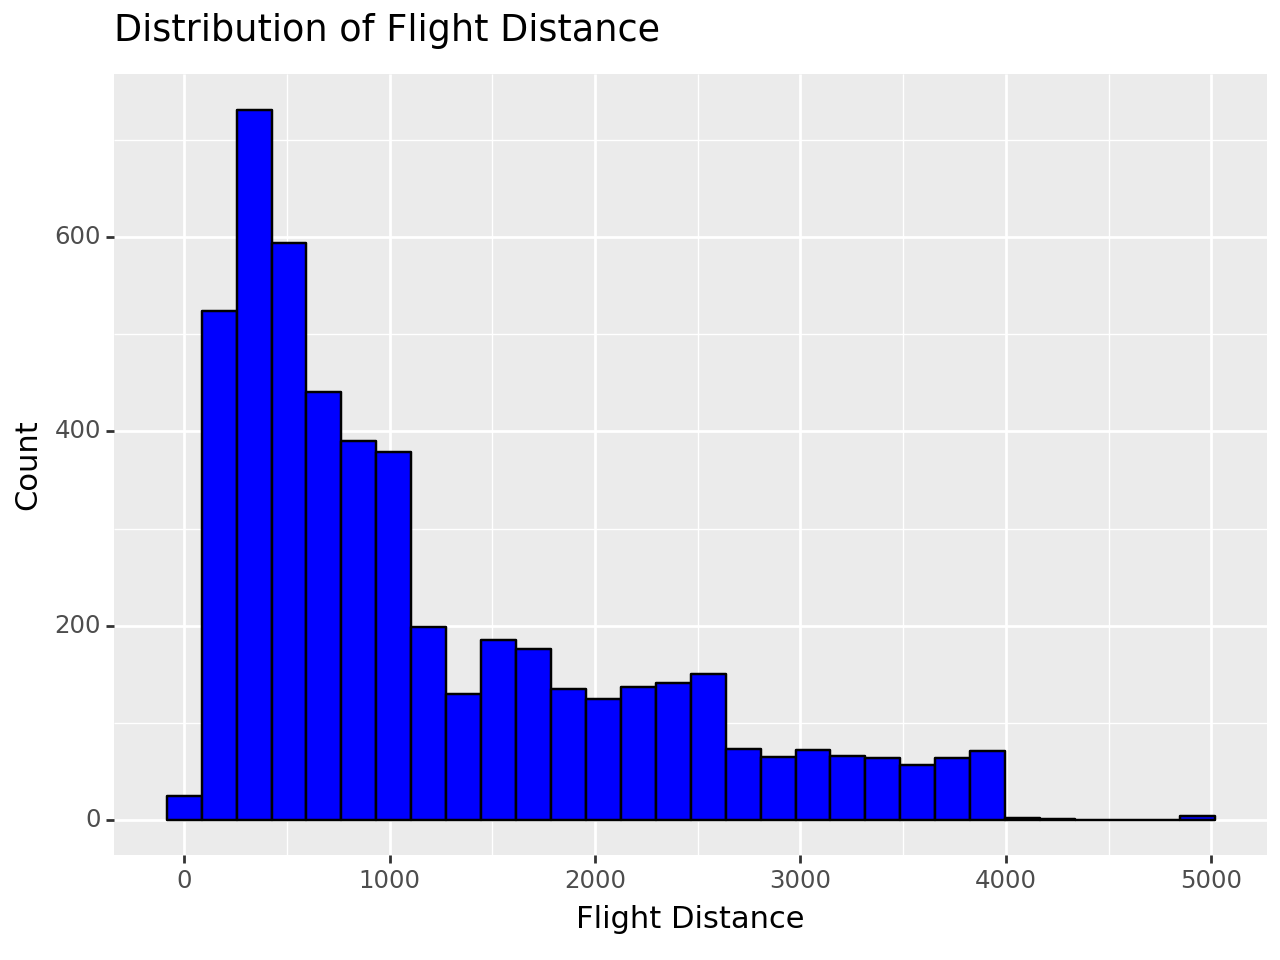

<Figure Size: (640 x 480)>

In [37]:
# plot1: Creating a histogram to visualize the distribution of flight distances
plot1 = (
    ggplot(sampled_airline_data, aes(x='Flight_Distance')) +  # Initialize the plot with 'sampled_airline_data' and set 'Flight_Distance' for the x-axis
    geom_histogram(bins=30, fill="blue", color="black") +     # Add a histogram with 30 bins, blue fill, and black border
    labs(title='Distribution of Flight Distance',             # Set the title of the plot
         x='Flight Distance',                                 # Label for the x-axis
         y='Count')                                           # Label for the y-axis
)

# Display the plot
plot1

#### 3.3.2 Distribution of dependent variable "Age"

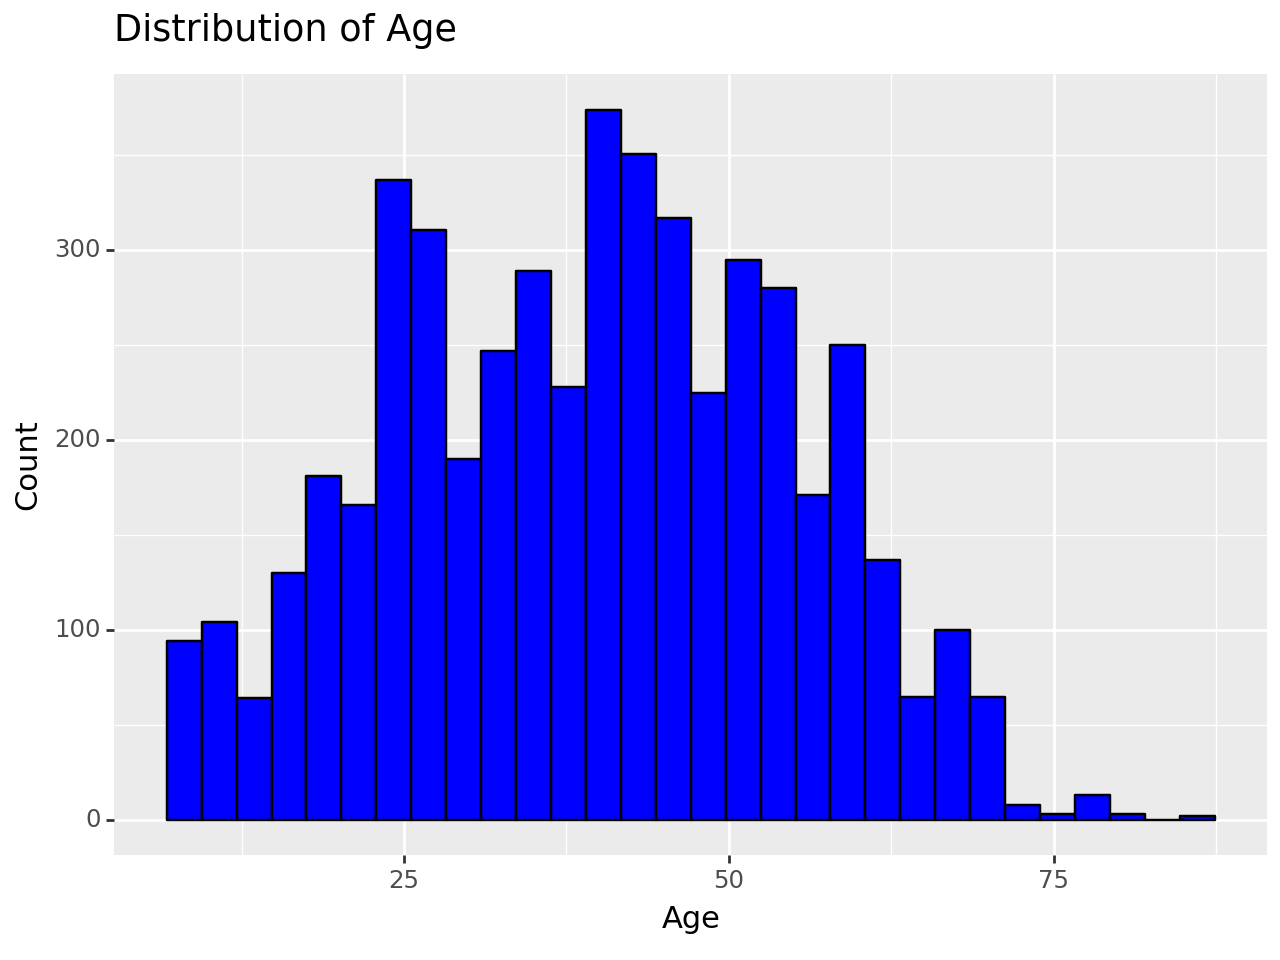

<Figure Size: (640 x 480)>

In [38]:
# plot2: Creating a histogram for the 'Age' distribution
plot2 = (
    ggplot(sampled_airline_data, aes(x='Age')) +             # Initialize the plot with 'sampled_airline_data', setting 'Age' for the x-axis
    geom_histogram(bins=30, fill="blue", color="black") +    # Add a histogram geom with 30 bins, blue fill color, and black borders
    labs(title='Distribution of Age',                        # Set the title of the plot as 'Distribution of Age'
         x='Age',                                            # Label for the x-axis as 'Age'
         y='Count')                                          # Label for the y-axis as 'Count'
)

# Displaying the plot
plot2

#### 3.3.3 Distribution of dependent variable "In-flight Service"

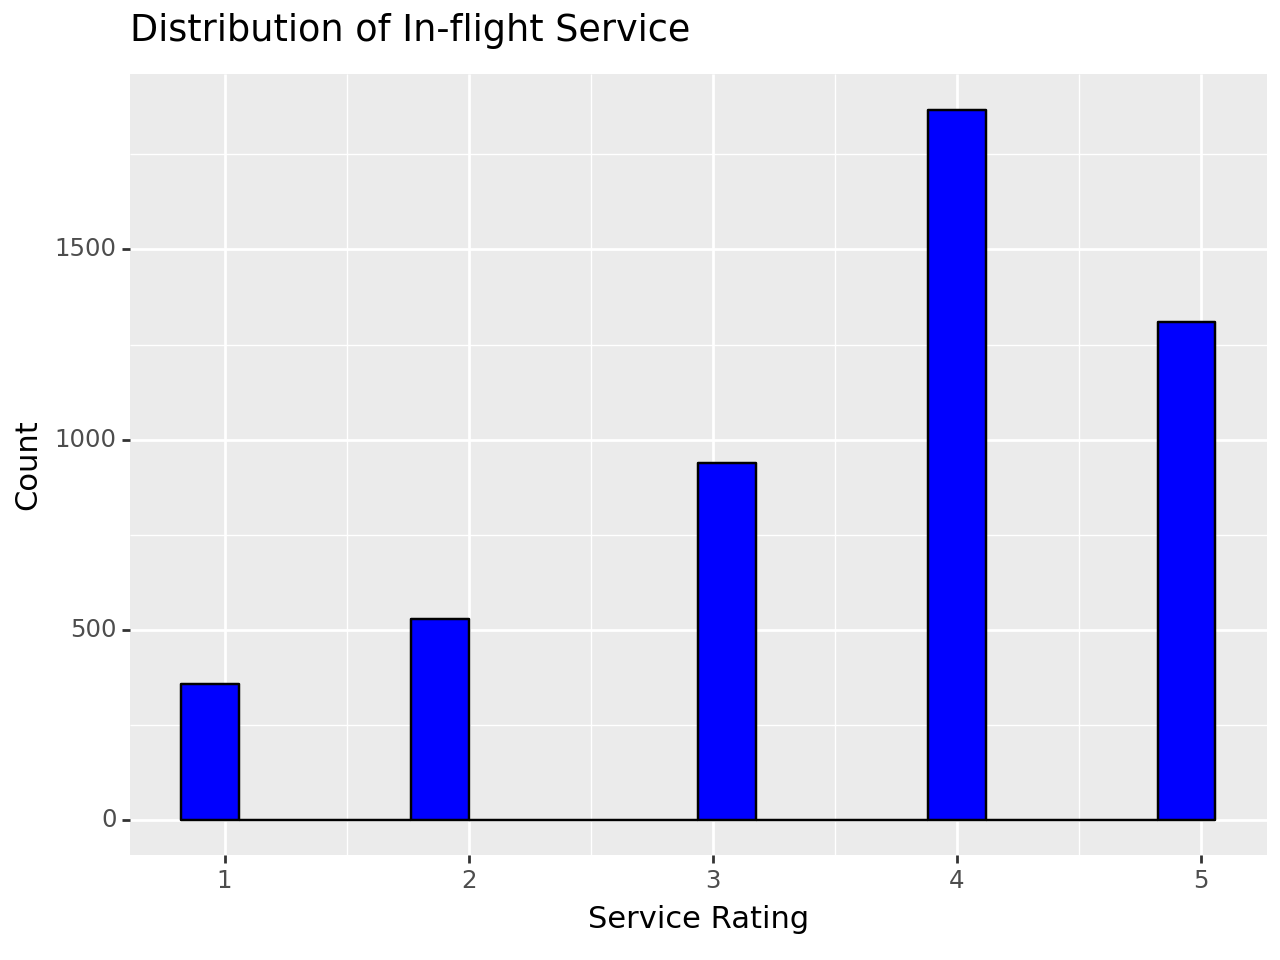

<Figure Size: (640 x 480)>

In [39]:
# plot3: Creating a histogram for the 'In_flight_Service' distribution
plot3 = (
    ggplot(sampled_airline_data, aes(x='In_flight_Service')) +  # Initializing the plot with 'sampled_airline_data', setting 'In_flight_Service' for the x-axis
    geom_histogram(fill="blue", color="black") +               # Adding a histogram geom with blue fill color and black borders; the number of bins is default
    labs(title='Distribution of In-flight Service',             # Setting the title of the plot as 'Distribution of In-flight Service'
         x='Service Rating',                                    # Labeling the x-axis as 'Service Rating'
         y='Count')                                             # Labeling the y-axis as 'Count'
)

# Displaying the plot
plot3

#### 3.3.4 Distribution of dependent variable "Seat_Comfort"

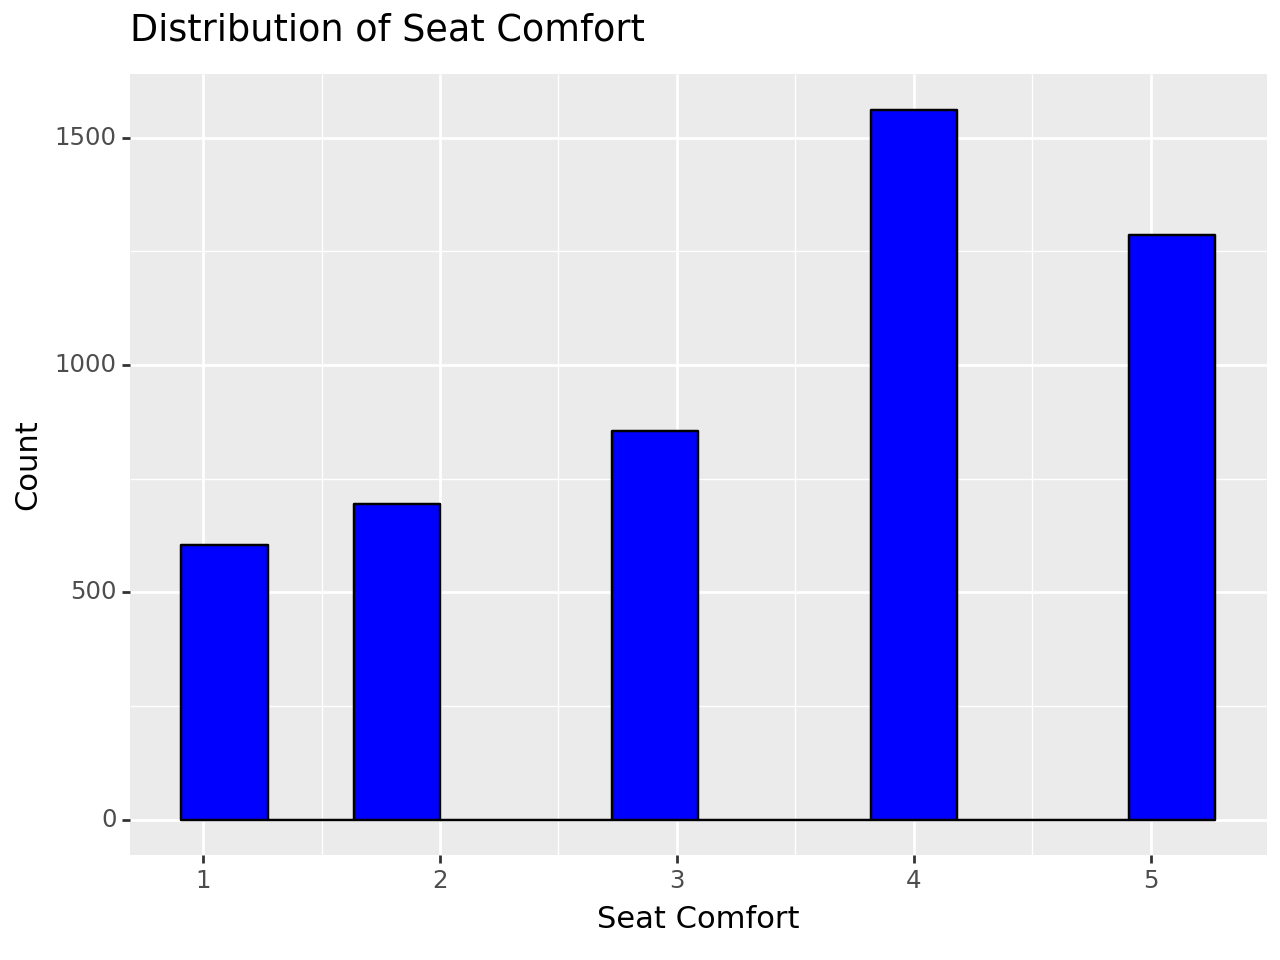

<Figure Size: (640 x 480)>

In [40]:
plot4 = (
    ggplot(sampled_airline_data, aes(x='Seat_Comfort')) +    # Initialize the plot with 'sampled_airline_data', setting 'Seat_Comfort' for the x-axis
    geom_histogram(fill="blue", color="black") +            # Add a histogram geom with default number of bins, blue fill color, and black borders
    labs(title='Distribution of Seat Comfort',              # Set the title of the plot as 'Distribution of Seat Comfort'
         x='Seat Comfort',                                  # Label for the x-axis as 'Seat Comfort'
         y='Count')                                         # Label for the y-axis as 'Count'
)

# Displaying the plot
plot4

#### 3.3.5 Distribution of dependent variable "Leg_Room_Service"

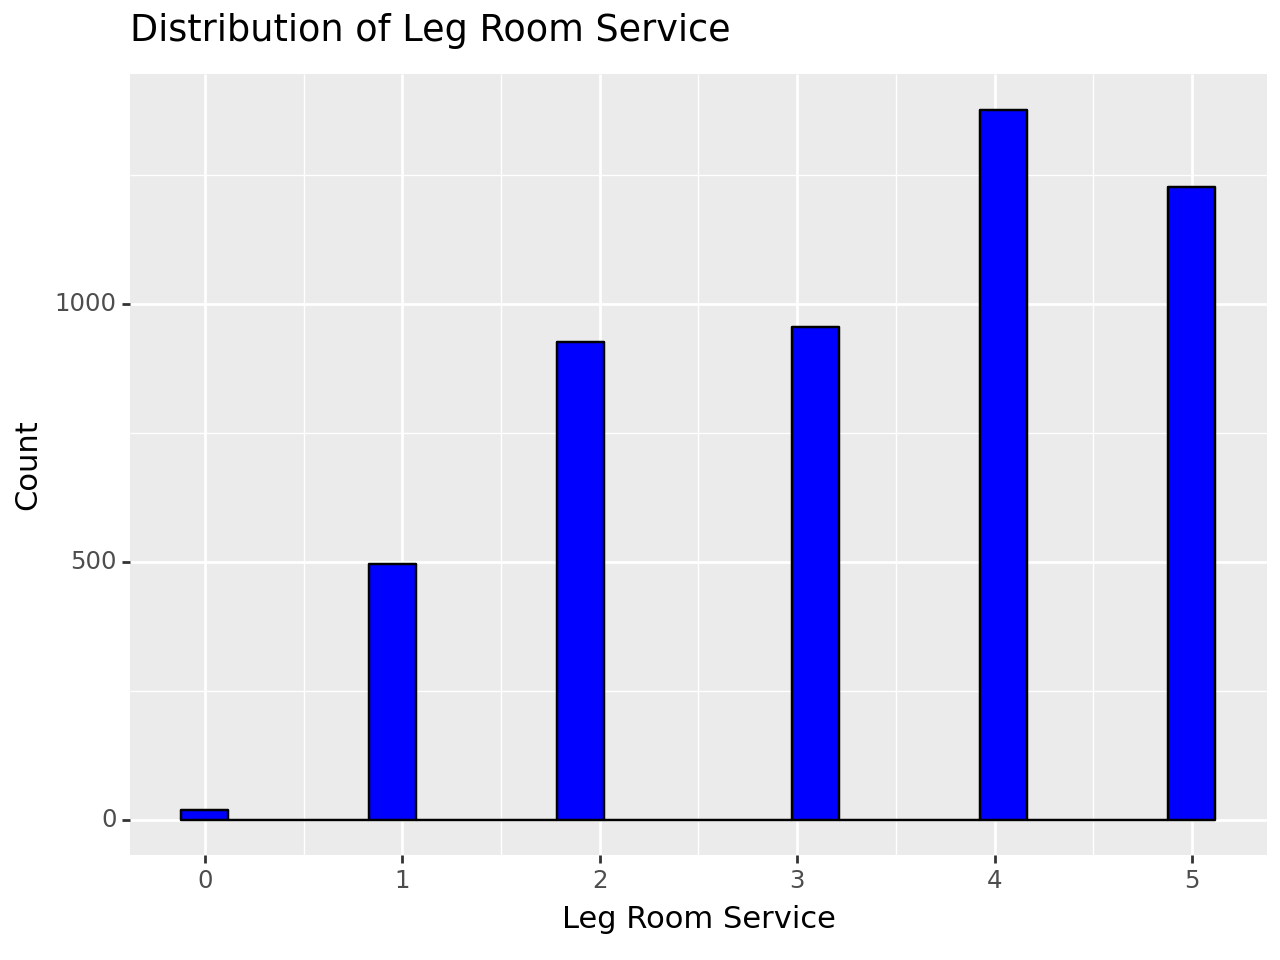

<Figure Size: (640 x 480)>

In [41]:
# Plot 5: Distribution of 'Leg Room Service' ratings
plot5 = (
    ggplot(sampled_airline_data, aes(x='Leg_Room_Service')) +   # Initialize the plot with 'sampled_airline_data', setting 'Leg_Room_Service' for the x-axis
    geom_histogram(fill="blue", color="black") +               # Add a histogram geom with default number of bins, blue fill color, and black borders
    labs(title='Distribution of Leg Room Service',              # Set the title of the plot
         x='Leg Room Service',                                  # Label for the x-axis
         y='Count')                                             # Label for the y-axis
)

# Displaying the plot
plot5

#### 3.3.6 Distribution of dependent variable "Food_and_Drink"

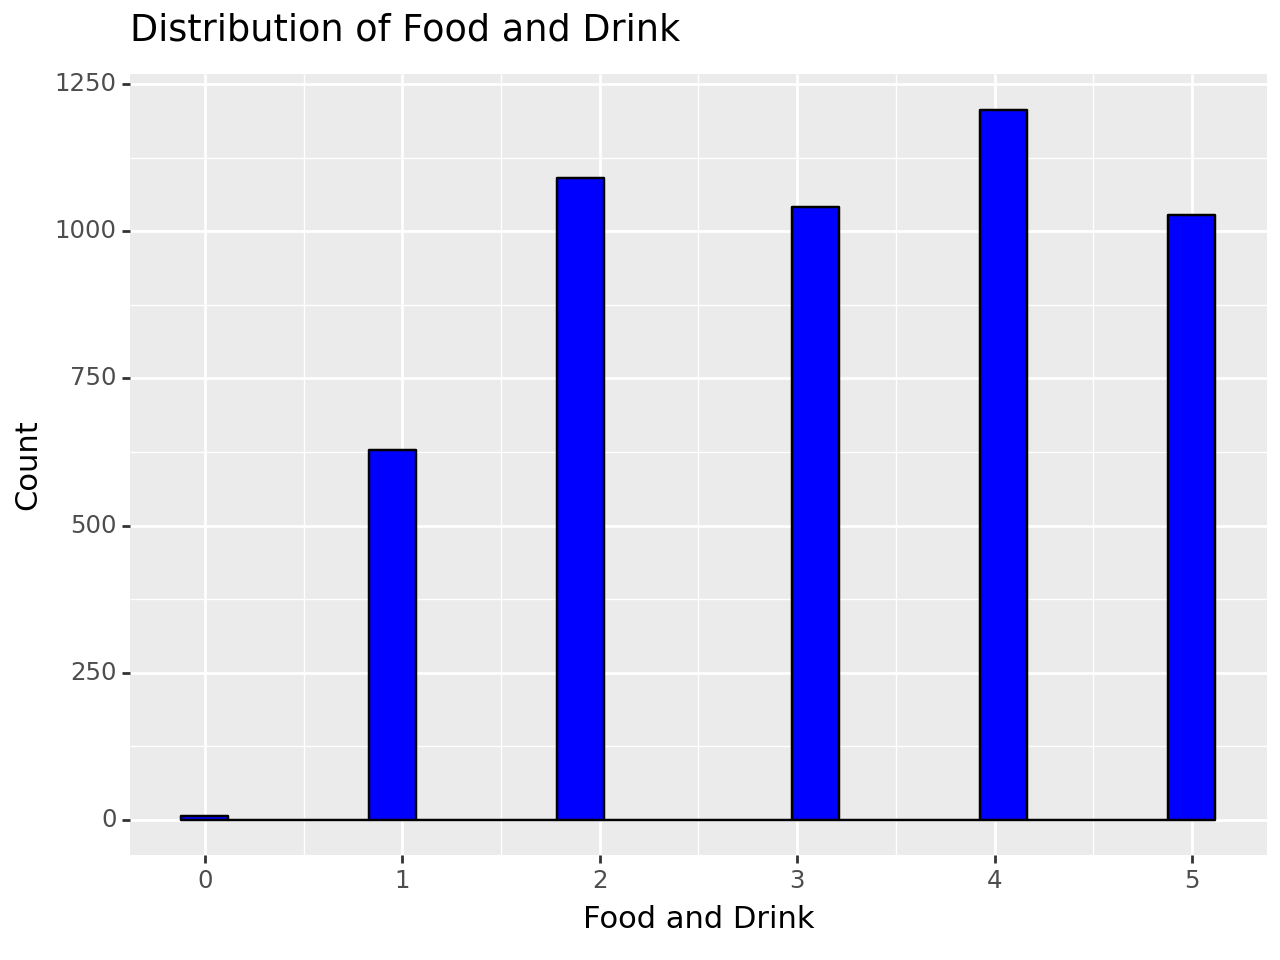

<Figure Size: (640 x 480)>

In [42]:
# Plot 6: Distribution of 'Food and Drink' ratings
plot6 = (
    ggplot(sampled_airline_data, aes(x='Food_and_Drink')) +     # Initialize the plot with 'sampled_airline_data', setting 'Food_and_Drink' for the x-axis
    geom_histogram(fill="blue", color="black") +               # Add a histogram geom
    labs(title='Distribution of Food and Drink',                # Set the title of the plot
         x='Food and Drink',                                    # Label for the x-axis
         y='Count')                                             # Label for the y-axis
)

# Displaying the plot
plot6

#### 3.3.7 Distribution of dependent variable "Departure_Delay"

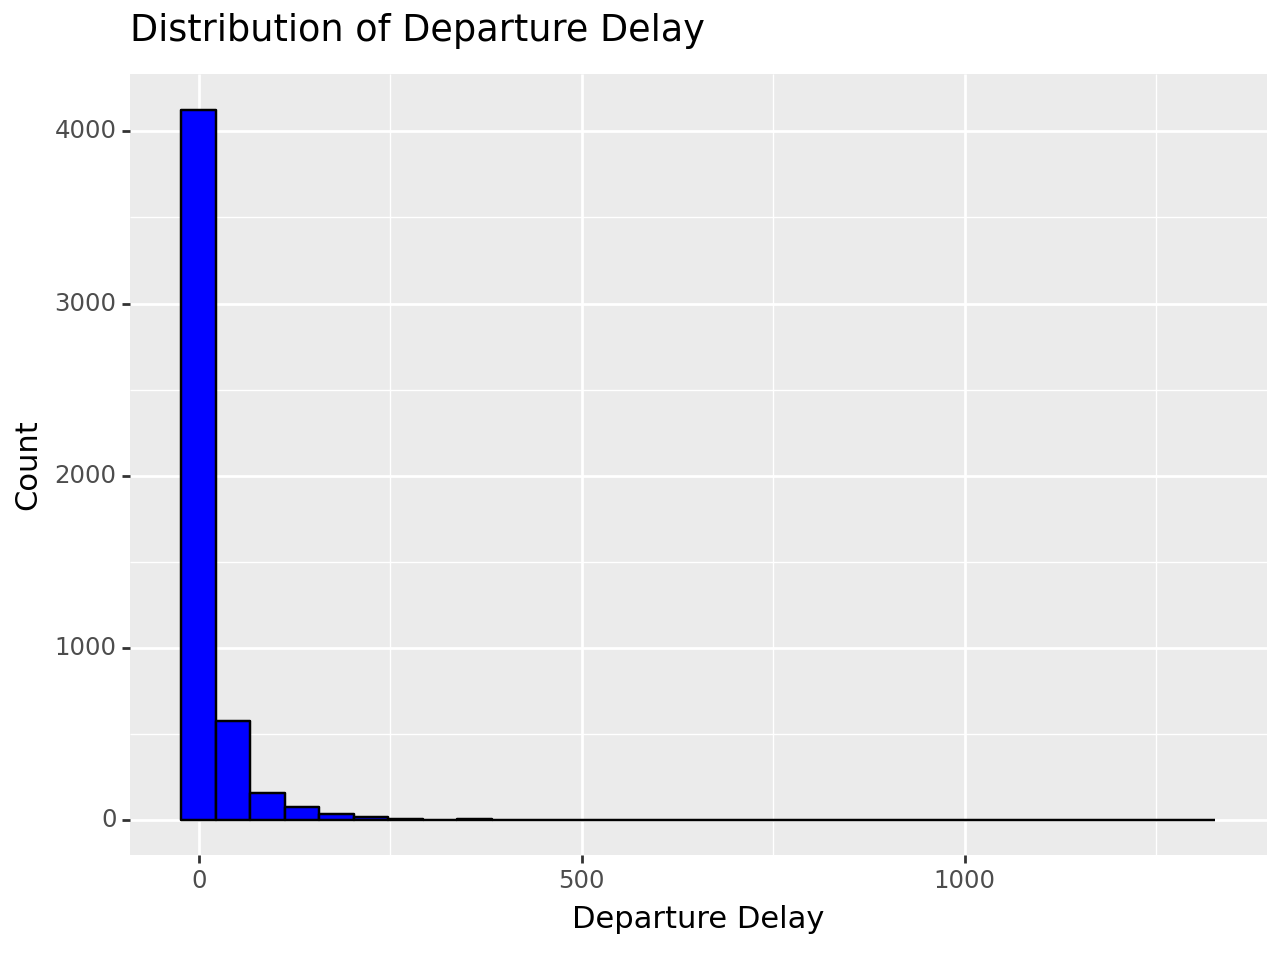

<Figure Size: (640 x 480)>

In [43]:
# Plot 7: Distribution of 'Departure Delay'
plot7 = (
    ggplot(sampled_airline_data, aes(x='Departure_Delay')) +    # Initialize the plot with 'sampled_airline_data', setting 'Departure_Delay' for the x-axis
    geom_histogram(bins=30, fill="blue", color="black") +       # Add a histogram geom with 30 bins
    labs(title='Distribution of Departure Delay',               # Set the title of the plot
         x='Departure Delay',                                   # Label for the x-axis
         y='Count')                                             # Label for the y-axis
)

# Displaying the plot
plot7

#### 3.3.8 Distribution of dependent variable "Arrival_Delay"

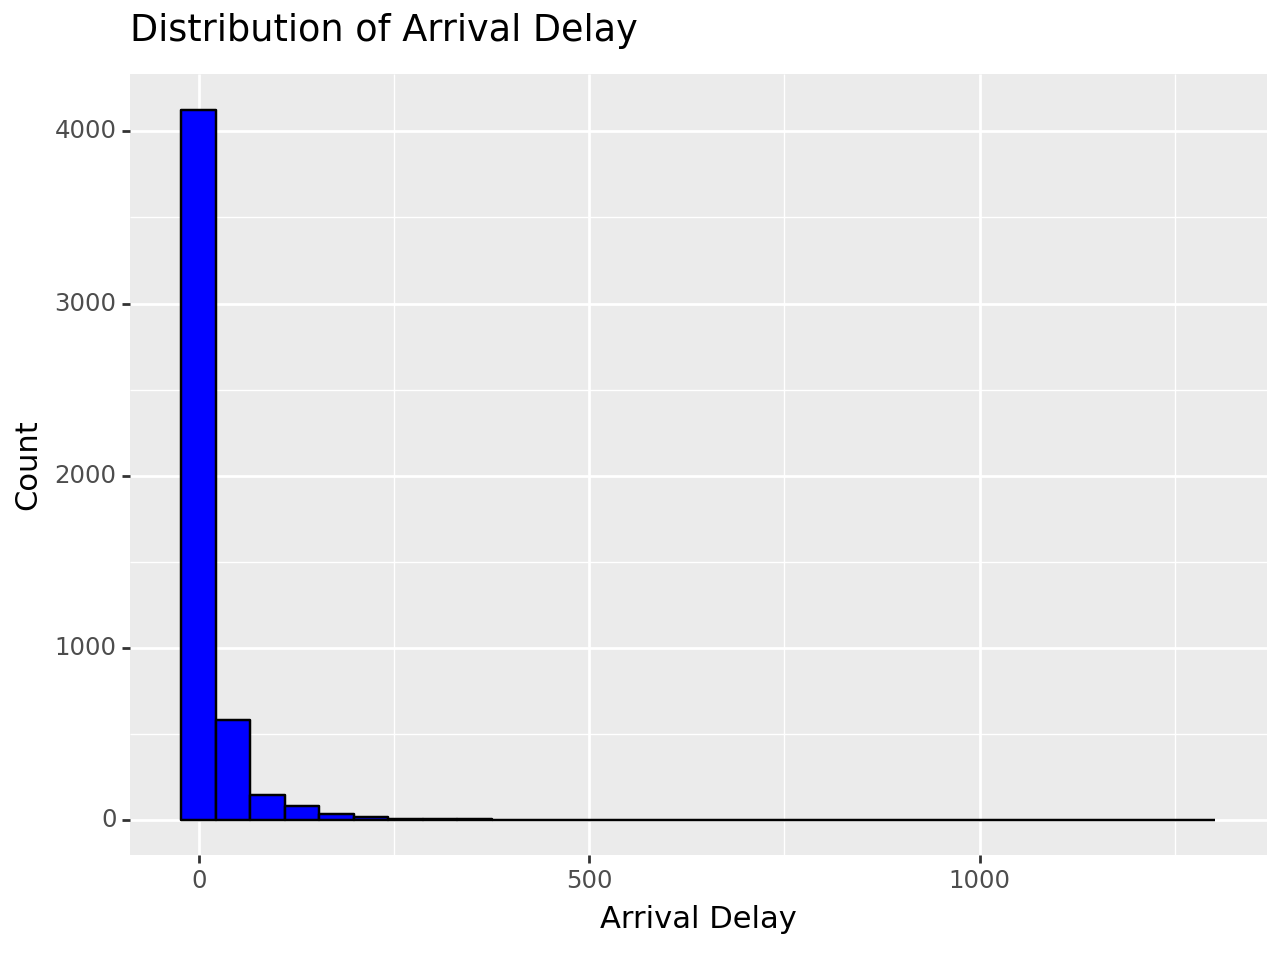

<Figure Size: (640 x 480)>

In [44]:
# Plot 8: Distribution of 'Arrival Delay'
plot8 = (
    ggplot(sampled_airline_data, aes(x='Arrival_Delay')) +      # Initialize the plot with 'sampled_airline_data', setting 'Arrival_Delay' for the x-axis
    geom_histogram(bins=30, fill="blue", color="black") +       # Add a histogram geom with 30 bins
    labs(title='Distribution of Arrival Delay',                 # Set the title of the plot
         x='Arrival Delay',                                     # Label for the x-axis
         y='Count')                                             # Label for the y-axis
)

# Displaying the plot
plot8

## Part 4: Regression

In this segment of our research, our objective is to authenticate and measure the influence of each category of variables outlined in "Part 1" on airline passenger contentment. The Exploratory Data Analysis (EDA) phase unveiled several crucial findings, notably the pronounced right-skewed distribution of flight length. To counteract this skewness and normalize the data, thereby facilitating more efficacious modeling, we shall implement a logarithmic transformation to the flight length variable.

Our methodology entails the application of simple linear regression models to scrutinize the correlations between the transformed flight length and other explanatory variables, and their impact on passenger satisfaction. We will employ heteroscedasticity-consistent standard error estimators, specifically opting for the HC1 covariance type. This selection is strategically made to yield more reliable standard errors in the presence of heteroscedasticity, thereby augmenting the validity and interpretability of our regression outcomes.

### 4.1 Creating Log_Flight_Distance

In [51]:
# Creating a new column for the log of Flight Distance
sampled_airline_data['Log_Flight_Distance'] = np.log(sampled_airline_data['Flight_Distance'])

### 4.2 Regression models

#### 4.2.1 Model 1: X and Y only, no control variables

In [45]:
# Model 1: Simple linear regression of customer satisfaction on log-transformed flight distance
model1 = smf.ols(
    formula="satisfied_customer ~ Log_Flight_Distance",  # Defining the regression formula (response ~ predictor)
    data=sampled_airline_data                           # Specifying the DataFrame to use
).fit(cov_type="HC1")                                   # Fitting the model with heteroscedasticity-consistent standard errors


The regression analysis for model 1, examining the impact of log-transformed flight distance on customer satisfaction in the airline industry reveals a significant positive relationship, with a coefficient of 0.1405. This indicates that an increase in the log of flight distance is associated with a rise in customer satisfaction. However, the model's modest explanatory power, indicated by an R-squared value of 0.067, suggests that flight distance alone does not fully capture the nuances of customer satisfaction. This finding highlights the necessity of including additional variables in the analysis to better understand the complex factors influencing customer satisfaction in the airline sector.

#### 4.2.2 Model 2: Demographic Indicators

In [46]:
# Model 2: Multiple linear regression including Age and Gender as additional predictors
model2 = smf.ols(
    formula="satisfied_customer ~ Log_Flight_Distance + Age + Female", # Adding Age and Female as additional predictors
    data=sampled_airline_data
).fit(cov_type="HC1")

The regression analysis for Model 2, exploring the influence of log-transformed flight distance, age, and gender on customer satisfaction in the airline industry, demonstrates a nuanced relationship among these factors. The model shows a significant positive correlation between log-transformed flight distance and customer satisfaction, with a coefficient of 0.1356, implying that longer flights are likely to yield higher passenger satisfaction. Additionally, age has a positive effect (coefficient: 0.0042), suggesting that satisfaction slightly increases with age. The gender variable ('Female'), with a coefficient of -0.0125, does not show a significant impact on satisfaction. Despite the model’s R-squared value of 0.083, indicating that about 8.3% of the variance in customer satisfaction is explained, the modest explanatory power highlights the complexity of the factors affecting satisfaction. This suggests the need to consider more variables to gain a comprehensive understanding of customer satisfaction dynamics in the airline sector.

#### 4.2.3 Model 3: Travel Type/Class Indicators

In [47]:
# Model 3: Multiple linear regression including flight class and type of travel as predictors
model3 = smf.ols(
    formula="satisfied_customer ~ Log_Flight_Distance + Class_Economy + Class_Economy_Plus + Type_of_Travel_Personal", # Adding flight class and type of travel as predictors
    data=sampled_airline_data
).fit(cov_type="HC1")

The regression analysis for Model 3, examining various factors affecting customer satisfaction in the airline industry, reveals a more comprehensive understanding of the determinants of passenger experience. The model, with an R-squared value of 0.320, indicates that approximately 32% of the variance in customer satisfaction is explained by the variables included.  A notable finding is the positive influence of the log-transformed flight distance on satisfaction, evidenced by a coefficient of 0.0397. This suggests that an increase in flight distance is associated with a modest increase in the probability of a passenger being satisfied. The model also reveals significant impacts of travel class on satisfaction. Passengers in Economy and Economy Plus classes are less likely to be satisfied compared to those in higher classes, as indicated by negative coefficients of -0.3466 and -0.3151, respectively. Additionally, the type of travel plays a crucial role, with personal travel negatively impacting satisfaction (coefficient: -0.2785). These findings underscore the multifaceted nature of customer satisfaction in air travel, influenced not only by the journey's length but also by the class of travel and the purpose of the trip.

#### 4.2.4 Model 4: In-Flight Service Indicators

In [48]:
# Model 4: Multiple linear regression including in-flight service indicators as predictors
model4 = smf.ols(
    formula="satisfied_customer ~ Log_Flight_Distance + In_flight_Service + Seat_Comfort + Leg_Room_Service + Food_and_Drink", # Adding in-flight service indicators as predictors
    data=sampled_airline_data
).fit(cov_type="HC1")


The regression analysis for Model 4, examining the impact of log-transformed flight distance and various in-flight service factors on customer satisfaction in the airline industry, reveals significant relationships between these variables and passenger satisfaction. The model indicates that log-transformed flight distance is positively correlated with customer satisfaction, with a coefficient of 0.0958. This suggests that longer flights tend to be associated with higher levels of satisfaction. In-flight service factors also demonstrate substantial influence. Specifically, the coefficients for in-flight service (0.0604), seat comfort (0.0993), and leg room service (0.0826) all indicate positive effects on satisfaction, highlighting the importance of these aspects in the overall passenger experience. The food and drink variable, while also positive, shows a smaller effect (coefficient: 0.0100) and is less statistically significant. With an R-squared value of 0.249, the model explains about 24.9% of the variance in customer satisfaction. While this points to a moderate explanatory power, it also underscores the multifaceted nature of customer satisfaction and the potential for other unexplored variables to contribute to the model.

#### 4.2.5 Model 5: Delay Indicators

In [49]:
# Model 5: Multiple linear regression including departure and arrival delays as predictors
model5 = smf.ols(
    formula="satisfied_customer ~ Log_Flight_Distance + Departure_Delay + Arrival_Delay", # Adding departure and arrival delays as predictors
    data=sampled_airline_data
).fit(cov_type="HC1")

The regression analysis for Model 1, reveals a significant positive correlation between the log-transformed flight distance and customer satisfaction, with a coefficient of 0.1400, indicating that increased flight distance is likely associated with higher passenger satisfaction. Additionally, the model examines the effects of both departure and arrival delays. The coefficient for departure delay (0.0014) suggests a slight positive impact on satisfaction, although this effect is marginally significant. Conversely, arrival delay demonstrates a negative effect on customer satisfaction, with a coefficient of -0.0020, indicating that longer arrival delays tend to decrease satisfaction. With an R-squared value of 0.070, the model explains approximately 7% of the variance in customer satisfaction. This modest explanatory power implies that while flight distance and delays are relevant, they capture only a small portion of the factors affecting satisfaction.

### 4.3 Regression Table

In [56]:
stargazer = Stargazer([model1, model2, model3, model4, model5])
stargazer.show_model_numbers(True)
stargazer.cov_spacing = 1.1
stargazer.covariate_order(
    [
        'Intercept', 
        'Log_Flight_Distance',
        'Age', 
        'Female',
        'Class_Economy', 
        'Class_Economy_Plus', 
        'Type_of_Travel_Personal', 
        'In_flight_Service', 
        'Seat_Comfort', 
        'Leg_Room_Service', 
        'Food_and_Drink', 
        'Departure_Delay', 
        'Arrival_Delay'
    ]
)

stargazer

### 4.4 Regression plot Visualization

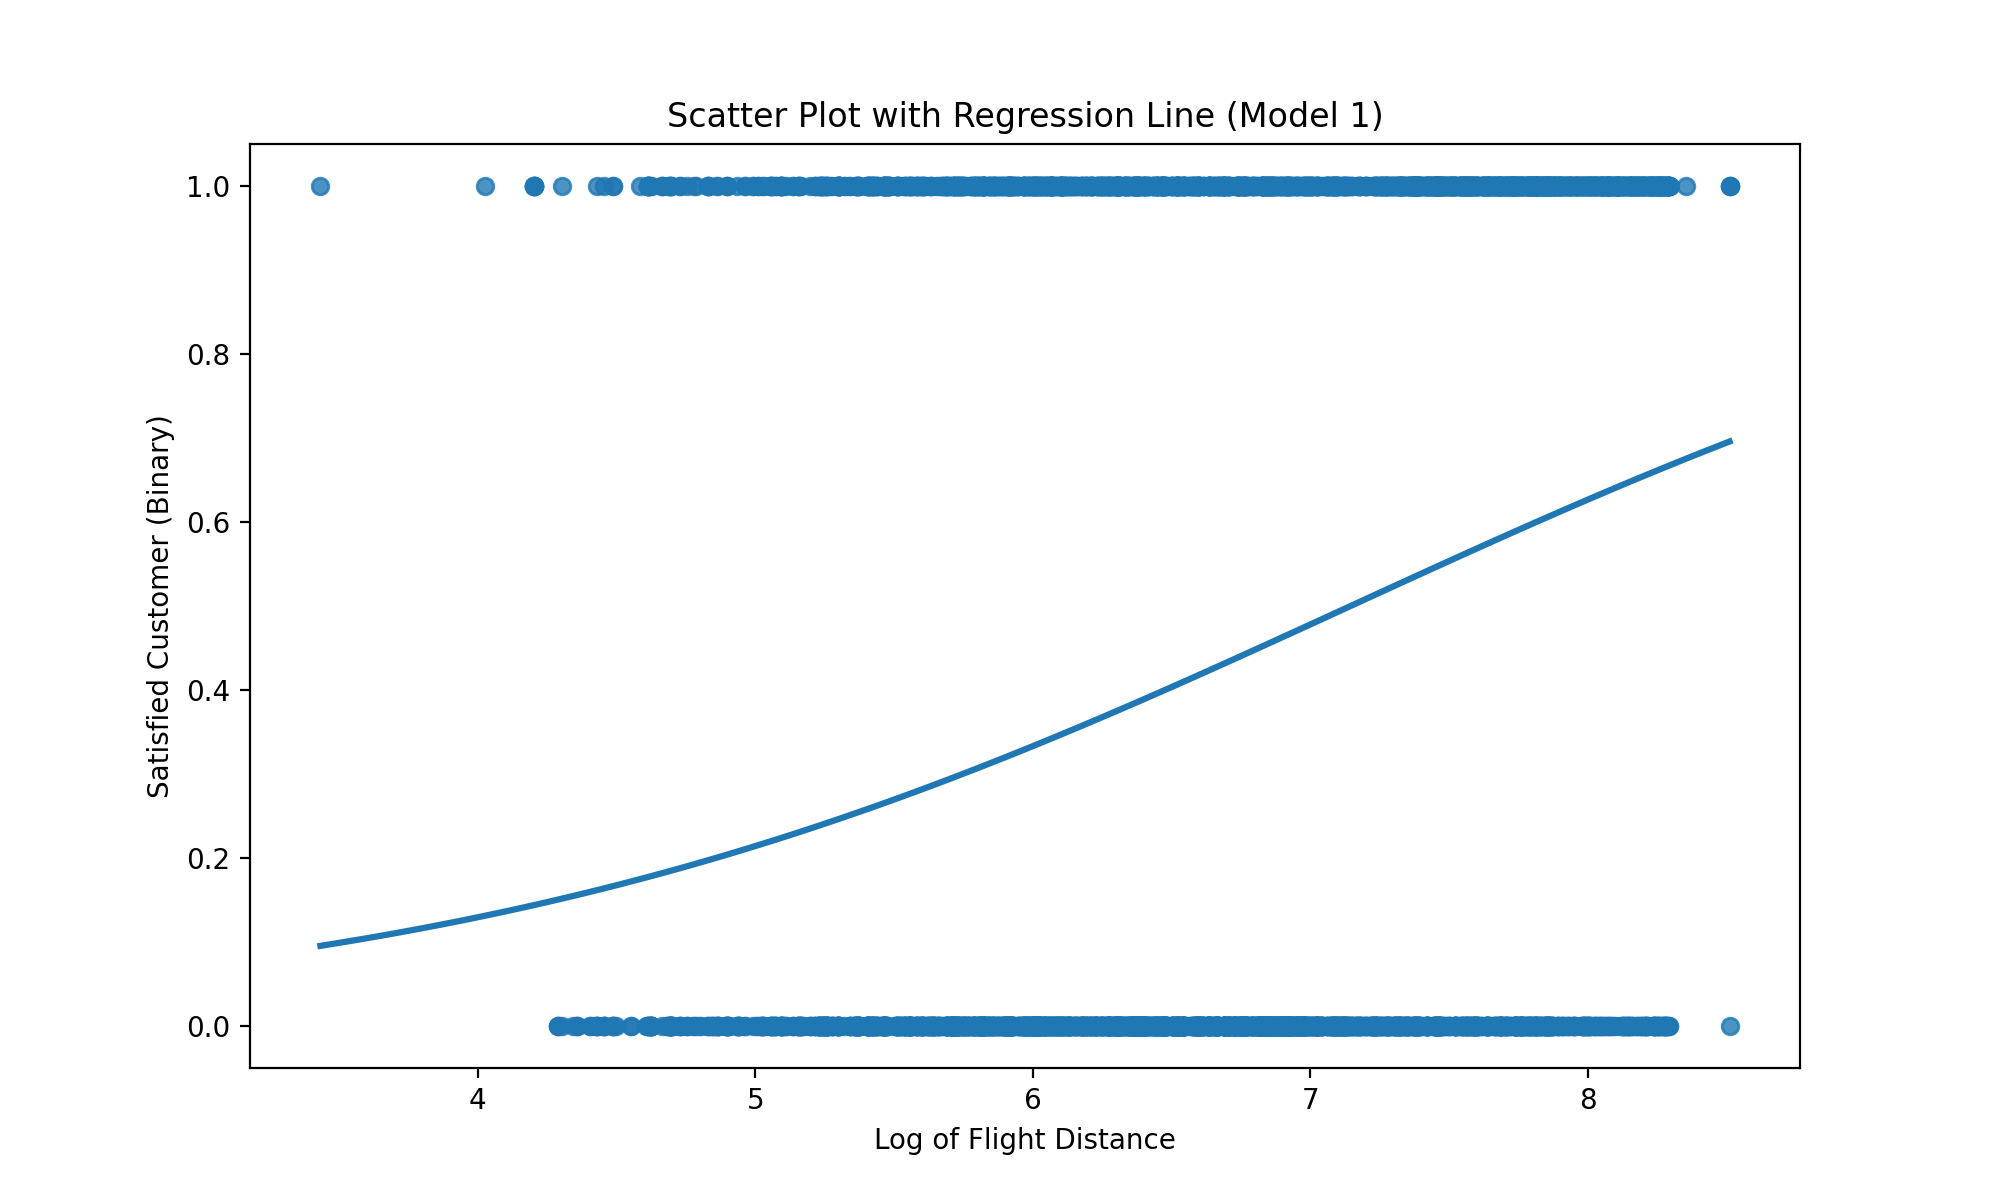

In [53]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatter plot with a regression line for Model 1
plt.figure(figsize=(10, 6))  # Setting the figure size to 10x6 inches
sns.regplot(
    x='Log_Flight_Distance',                     # Defining the x-axis variable
    y='satisfied_customer',                      # Defining the y-axis variable
    data=sampled_airline_data,                   # Specifying the DataFrame to use
    logistic=True,                               # Indicating that the regression line should be logistic since the response variable is binary
    ci=None                                      # Turning off the confidence interval for the regression line
)
plt.title("Scatter Plot with Regression Line (Model 1)")  # Adding a title to the plot
plt.xlabel("Log of Flight Distance")                      # Labeling the x-axis
plt.ylabel("Satisfied Customer (Binary)")                 # Labeling the y-axis
plt.show()                                                # Displaying the plot


### 4.5 Comparison of fit

In [54]:
# Importing the pandas library for data manipulation
import pandas as pd

# Creating a DataFrame to compare the fit of different regression models
model_comparison = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],               # Defining model names
    'R-squared': [model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared, model5.rsquared], # R-squared values for each model
    'Adjusted R-squared': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj, model4.rsquared_adj, model5.rsquared_adj], # Adjusted R-squared values
    'F-statistic': [model1.fvalue, model2.fvalue, model3.fvalue, model4.fvalue, model5.fvalue] # F-statistic for each model
}

comparison = pd.DataFrame(model_comparison)  # Creating a pandas DataFrame from the dictionary
comparison.set_index('Model', inplace=True) # Setting the 'Model' column as the index of the DataFrame
comparison = comparison.round(1)            # Rounding the values in the DataFrame to one decimal place

comparison.T  # Transposing the DataFrame for better readability



Model,Model 1,Model 2,Model 3,Model 4,Model 5
R-squared,0.1,0.1,0.3,0.2,0.1
Adjusted R-squared,0.1,0.1,0.3,0.2,0.1
F-statistic,357.9,161.2,738.1,432.0,125.1


## Part 5: Generalization and External Validity

In our statistical exploration of airline passenger satisfaction, we applied predictive models to the variables in our Ordinary Least Squares (OLS) models, aiming to validate their associations with customer satisfaction levels. These models were instrumental in establishing the relationship between log-transformed flight distance and customer satisfaction, confirming the foundational hypothesis of Model 1. Further, in Models 2 to 5, we examined the interaction between satisfaction and additional variables such as age, gender, travel class, in-flight service quality, and travel delays. This comprehensive approach illuminated the complex dynamics at play: for instance, the predictive models suggested that certain demographics, service quality, and travel class significantly impact satisfaction. 

In examining the R-squared and adjusted R-squared values across the models, we observed variations in explanatory power, reflecting the multifaceted nature of factors affecting passenger satisfaction. Models incorporating a broader range of variables, particularly those related to in-flight experience and operational efficiency, showed enhanced predictive accuracy. These findings suggest that passenger satisfaction is not merely a function of travel duration but is also intricately linked to service quality, demographic factors, and travel conditions. The external validity of these models, reinforced through robustness checks, affirms their applicability across various airline industry contexts. This analysis underscores the importance of a holistic approach in evaluating passenger satisfaction, offering valuable insights for strategic decision-making aimed at optimizing the passenger experience.

## Part 6: Causal interpretation / main summary

In our comprehensive exploration of airline passenger contentment, we meticulously examined the intricate interplay of a myriad of factors, encompassing the log-transformed distance of flights, age, gender, the various classes of travel, and the caliber of in-flight services. Our investigation, particularly focused on Model 3, unearthed a significant correlation between the level of satisfaction expressed by passengers and their class of travel. This finding suggests that passengers situated in superior travel classes, such as Economy Plus, tend to report heightened levels of satisfaction. Additionally, Model 4 shed light on the pivotal role played by in-flight service elements, with variables such as seat comfort and the quality of food demonstrating a pronounced influence on the satisfaction levels of passengers.

Nonetheless, it is imperative to acknowledge the limitations in the causal interpretation of these relationships. While our regression models do suggest robust associations—for instance, an extended flight distance (as elucidated in Model 1) exhibiting a mild correlation with heightened satisfaction, and operational elements like travel delays (as depicted in Model 5) adversely affecting passenger experiences. These conclusions are predominantly correlative rather than causative in nature. Given that our models are predicated on observational data, they are adept at revealing patterns and associations, but they fall short in providing a robust degree of generalizability, as is evidenced by the relatively low R values. This limitation may be attributable to the potential exclusion of other pertinent variables not encompassed within the scope of this study.

Thus, while our research offers valuable insights into the plethora of factors that influence passenger satisfaction, it is crucial to interpret these findings as indicative trends rather than definitive causes of satisfaction. To unravel these relationships with greater precision and establish causal connections, further research is warranted. This subsequent inquiry could potentially adopt experimental designs, which would facilitate a more in-depth exploration and understanding of these intricate dynamics.

## Part 7: Conclusion

Our exhaustive investigation into airline passenger satisfaction yields essential insights, pivotal for guiding both strategic business initiatives and policy formulations within the airline industry. The results of our study cast light on critical aspects that airlines might target to augment passenger satisfaction.

Our analysis intriguingly revealed a subtle yet impactful influence of flight distance on satisfaction. This highlights an opportunity for airlines operating longer flights to boost passenger experience, potentially through augmented services or amenities specifically designed for prolonged travel durations.

Foremost, the significance of travel class in shaping satisfaction levels is profound. Passengers in premium classes, such as Economy Plus, consistently reported elevated satisfaction levels. This underscores a pronounced preference for enhanced comfort and additional amenities. Airlines might contemplate enhancements in service quality within economy classes or introducing more enticing features in premium classes to attract a wider spectrum of passengers.

The quality of in-flight services, encompassing aspects like seat comfort and food quality, is also instrumental in crafting passenger experiences. Investment in elevating these facets is likely to lead to a notable increase in customer satisfaction. Such improvements could include advanced training for cabin crew, seating upgrades, or refining the quality of meals provided.

Operational efficiency, especially in the context of travel delays, is a crucial determinant. Delays were found to have a negative correlation with satisfaction, underscoring the imperative for airlines to focus on timely departures and arrivals. The adoption of efficient scheduling and the formulation of effective contingency strategies to curtail delays could become a central focus.

Nonetheless, it is essential to acknowledge the constraints of our analysis in deducing causality. While the associations identified are robust, they ought to be perceived as precursors for further research rather than conclusive evidence.

In summary, our study offers valuable, actionable insights for airlines to refine their service offerings, boost operational efficiency, and ultimately enhance customer satisfaction. Such enhancements, albeit necessitating investment, can lead to increased customer loyalty, favorable referrals, and consequently, heightened profitability in the competitive realm of the airline industry. Moreover, these insights can be instrumental for policymakers in developing regulations and standards aimed at elevating the passenger experience industry-wide.